In [2]:
import pandas as pd

In [ ]:
# loadcleaned RASFF dataset
rasff = pd.read_csv(r"F:\Final_project\rasff_clean1.csv")

In [3]:
rasff['hazards']

0                             NaN
1                             NaN
2                             NaN
3         Listeria monocytogenes 
4               not in catalogue 
                   ...           
27392     formaldehyde  migration
27393    Salmonella  enteritidis 
27394               fosthiazate  
27395            aflatoxin total 
27396              Aflatoxins B1 
Name: hazards, Length: 27397, dtype: object

In [16]:
import openai
import os

# For environment variables (recommended for API key management)
from dotenv import load_dotenv
load_dotenv()

# Set up OpenAI client
client = openai.OpenAI(
    api_key=os.getenv("OPENAI_API_KEY")
)


print("OpenAI client initialized successfully!") 

OpenAI client initialized successfully!


In [9]:
hazard_categories = [
    "Microbiological",
    "Chemical (pesticides, metals)",
    "Mycotoxins",
    "Physical contaminants",
    "Migration from packaging",
    "Fraud/adulteration",
    "Allergen",
    "Others"
]

In [11]:


def classify_hazard(subject):
    prompt = f"""
You are a food safety expert. Categorize the following RASFF subject line into exactly ONE of these hazard categories:

Categories:
- Microbiological
- Chemical (pesticides, metals)
- Mycotoxins
- Physical contaminants
- Migration from packaging
- Fraud/adulteration
- Allergen
- Others

Below are examples for each category:

Microbiological:
1. "Suspected Salmonella in beef and hamburgers from Sweden"
2. "Listeria monocytogenes found in soft cheese from France"

Chemical (pesticides, metals):
1. "Food supplements from USA containing prohibited titanium dioxide"
2. "Excessive lead detected in curry powder from India"

Mycotoxins:
1. "Aflatoxin B1 found in peanuts from Argentina"
2. "Ochratoxin A detected in dried figs from Turkey"

Physical contaminants:
1. "Metal fragments found in chocolate bars"
2. "Glass pieces detected in jars of tomato sauce"

Migration from packaging:
1. "Bisphenol A migration from plastic food container"
2. "Primary aromatic amines migrating from printed packaging into noodles"

Fraud/adulteration:
1. "Label/document mismatch in instant noodles from South Korea"
2. "Extra virgin olive oil adulterated with cheaper seed oils"

Allergen:
1. "Undeclared milk in vegan protein snack"
2. "Presence of undeclared peanuts in chocolate cookies"

If the subject does not clearly fit any category, assign: "Others".

Now classify the following subject:

Subject: "{subject}"

Output only the category name.
"""

    response = client.chat.completions.create(
        model="gpt-4o-mini",   # recommended model
        messages=[{"role": "user", "content": prompt}],
        temperature=0
    )

    return response.choices[0].message.content.strip()






In [12]:
# Create a new column "Hazard_Category_LLM"
# WARNING: For large datasets, do this in chunks to avoid API rate limits
rasff['Hazard_Category_LLM'] = rasff['subject'].apply(classify_hazard)

KeyboardInterrupt: 

In [ ]:
from openai import OpenAI
client = OpenAI()

def classify_batch(subject_list):
    # Join subjects into one multi-item prompt
    formatted = "\n".join([f"{i+1}. {s}" for i, s in enumerate(subject_list)])

    prompt = f"""

You are a food safety expert. Categorize the following RASFF subject line into exactly ONE of these hazard categories:

Categories:
- Microbiological
- Chemical (pesticides, metals)
- Mycotoxins
- Physical contaminants
- Migration from packaging
- Fraud/adulteration
- Allergen
- Others

Below are examples for each category:

Microbiological:
1. "Suspected Salmonella in beef and hamburgers from Sweden"
2. "Listeria monocytogenes found in soft cheese from France"

Chemical (pesticides, metals):
1. "Food supplements from USA containing prohibited titanium dioxide"
2. "Excessive lead detected in curry powder from India"

Mycotoxins:
1. "Aflatoxin B1 found in peanuts from Argentina"
2. "Ochratoxin A detected in dried figs from Turkey"

Physical contaminants:
1. "Metal fragments found in chocolate bars"
2. "Glass pieces detected in jars of tomato sauce"

Migration from packaging:
1. "Bisphenol A migration from plastic food container"
2. "Primary aromatic amines migrating from printed packaging into noodles"

Fraud/adulteration:
1. "Label/document mismatch in instant noodles from South Korea"
2. "Extra virgin olive oil adulterated with cheaper seed oils"

Allergen:
1. "Undeclared milk in vegan protein snack"
2. "Presence of undeclared peanuts in chocolate cookies"

If the subject does not clearly fit any category, assign: "Others".

Now classify the following subject:

Subject: "{formatted}"

Return the output as a numbered list with only the category per line.
"""

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[{"role": "user", "content": prompt}],
        temperature=0
    )

    # Split output into list of categories
    output = response.choices[0].message.content.strip().split("\n")
    output = [line.split(". ", 1)[1] for line in output]
    return output


# Process in batches
batch_size = 50
results = []

subjects = rasff["subject"].tolist()

for i in range(0, len(subjects), batch_size):
    batch = subjects[i:i + batch_size]
    categories = classify_batch(batch)
    results.extend(categories)
    print(f"Processed {i + len(batch)} items")

rasff["Hazard_Category_LLM"] = results


Processed 50 items
Processed 100 items
Processed 150 items
Processed 200 items
Processed 250 items
Processed 300 items
Processed 350 items
Processed 400 items
Processed 450 items
Processed 500 items
Processed 550 items
Processed 600 items
Processed 650 items
Processed 700 items
Processed 750 items
Processed 800 items
Processed 850 items
Processed 900 items
Processed 950 items
Processed 1000 items
Processed 1050 items
Processed 1100 items
Processed 1150 items
Processed 1200 items
Processed 1250 items
Processed 1300 items
Processed 1350 items
Processed 1400 items
Processed 1450 items
Processed 1500 items
Processed 1550 items
Processed 1600 items
Processed 1650 items
Processed 1700 items
Processed 1750 items
Processed 1800 items
Processed 1850 items
Processed 1900 items
Processed 1950 items
Processed 2000 items
Processed 2050 items
Processed 2100 items
Processed 2150 items
Processed 2200 items
Processed 2250 items
Processed 2300 items
Processed 2350 items
Processed 2400 items
Processed 24

In [15]:
rasff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27397 entries, 0 to 27396
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   reference            27397 non-null  float64
 1   category             27397 non-null  object 
 2   type                 27397 non-null  object 
 3   subject              27397 non-null  object 
 4   date                 27397 non-null  object 
 5   notifying_country    27397 non-null  object 
 6   classification       27397 non-null  object 
 7   risk_decision        27397 non-null  object 
 8   distribution         18759 non-null  object 
 9   forAttention         14966 non-null  object 
 10  forFollowUp          13810 non-null  object 
 11  operator             27303 non-null  object 
 12  origin               26823 non-null  object 
 13  hazards              20241 non-null  object 
 14  year                 27397 non-null  int64  
 15  month                27397 non-null 

In [14]:
rasff['Hazard_Category_LLM']

0                        Microbiological
1                                 Others
2          Chemical (pesticides, metals)
3                        Microbiological
4                                 Others
                      ...               
27392         Migration from packaging  
27393                  Microbiological  
27394    Chemical (pesticides, metals)  
27395                       Mycotoxins  
27396                         Mycotoxins
Name: Hazard_Category_LLM, Length: 27397, dtype: object

In [16]:
rasff.to_csv("rasff_clean2.csv", index=False)

In [17]:
rasff['Hazard_Category_LLM'].value_counts()

Hazard_Category_LLM
Chemical (pesticides, metals)            6430
Microbiological                          4632
Others                                   3222
Chemical (pesticides, metals)            2951
Mycotoxins                               2356
Microbiological                          1958
Others                                   1304
Mycotoxins                                971
Allergen                                  862
Physical contaminants                     789
Migration from packaging                  556
Allergen                                  370
Fraud/adulteration                        352
Physical contaminants                     281
Migration from packaging                  233
Fraud/adulteration                        124
Chemical (migration from packaging)         6
Name: count, dtype: int64

In [3]:
# loadcleaned RASFF dataset
rasff = pd.read_csv(r"F:\Final_project\rasff_clean2.csv")

In [4]:
rasff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27397 entries, 0 to 27396
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   reference            27397 non-null  float64
 1   category             27397 non-null  object 
 2   type                 27397 non-null  object 
 3   subject              27397 non-null  object 
 4   date                 27397 non-null  object 
 5   notifying_country    27397 non-null  object 
 6   classification       27397 non-null  object 
 7   risk_decision        27397 non-null  object 
 8   distribution         18759 non-null  object 
 9   forAttention         14966 non-null  object 
 10  forFollowUp          13810 non-null  object 
 11  operator             27303 non-null  object 
 12  origin               26823 non-null  object 
 13  hazards              20241 non-null  object 
 14  year                 27397 non-null  int64  
 15  month                27397 non-null 

In [4]:
rasff['Hazard_Category_LLM'].nunique()

17

In [5]:
for c in rasff['Hazard_Category_LLM'].unique():
    print(repr(c))

'Microbiological'
'Others'
'Chemical (pesticides, metals)'
'Allergen'
'Mycotoxins'
'Migration from packaging'
'Physical contaminants  '
'Others  '
'Microbiological  '
'Allergen  '
'Chemical (pesticides, metals)  '
'Mycotoxins  '
'Fraud/adulteration  '
'Fraud/adulteration'
'Migration from packaging  '
'Physical contaminants'
'Chemical (migration from packaging)  '


In [6]:
rasff['len'] = rasff['Hazard_Category_LLM'].apply(len)
rasff[['Hazard_Category_LLM','len']].drop_duplicates()

,Hazard_Category_LLM,len
0,Microbiological,15
1,Others,6
2,"Chemical (pesticides, metals)",29
5,Allergen,8
12,Mycotoxins,10
13,Migration from packaging,24
50,Physical contaminants,23
51,Others,8
54,Microbiological,17
56,Allergen,10


In [7]:
import unicodedata
import re

def clean_text(x):
    if not isinstance(x, str):
        return x

    # Normalize unicode
    x = unicodedata.normalize("NFKC", x)

    # Remove zero-width characters
    x = re.sub(r"[\u200B-\u200D\uFEFF]", "", x)

    # Collapse all whitespace including NBSPs
    x = " ".join(x.split())

    return x.strip()

rasff["Hazard_Category_LLM"] = rasff["Hazard_Category_LLM"].apply(clean_text)


In [8]:
rasff['Hazard_Category_LLM'].value_counts()

Hazard_Category_LLM
Chemical (pesticides, metals)          9381
Microbiological                        6590
Others                                 4526
Mycotoxins                             3327
Allergen                               1232
Physical contaminants                  1070
Migration from packaging                789
Fraud/adulteration                      476
Chemical (migration from packaging)       6
Name: count, dtype: int64

In [9]:
rasff['Hazard_Category_LLM'] = rasff['Hazard_Category_LLM'].replace(
    {'Chemical (migration from packaging)': 'Migration from packaging'}
)


In [10]:
rasff['Hazard_Category_LLM'].value_counts()

Hazard_Category_LLM
Chemical (pesticides, metals)    9381
Microbiological                  6590
Others                           4526
Mycotoxins                       3327
Allergen                         1232
Physical contaminants            1070
Migration from packaging          795
Fraud/adulteration                476
Name: count, dtype: int64

In [11]:
rasff.to_csv("rasff_clean3.csv", index=False)

In [12]:
# loadcleaned RASFF dataset
rasff = pd.read_csv(r"F:\Final_project\rasff_clean3.csv")

In [13]:
rasff['Hazard_Category_LLM'].value_counts()

Hazard_Category_LLM
Chemical (pesticides, metals)    9381
Microbiological                  6590
Others                           4526
Mycotoxins                       3327
Allergen                         1232
Physical contaminants            1070
Migration from packaging          795
Fraud/adulteration                476
Name: count, dtype: int64

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_17596\2338271717.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hazards.values, y=top_hazards.index, palette='Spectral')


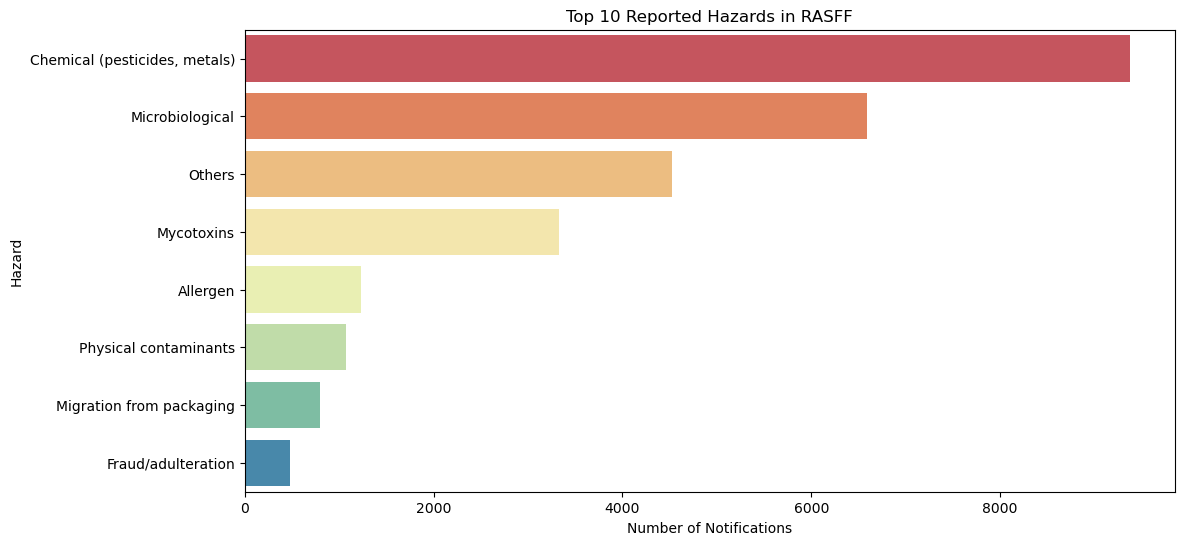

In [15]:
top_hazards = rasff['Hazard_Category_LLM'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=top_hazards.values, y=top_hazards.index, palette='Spectral')
plt.title("Top 10 Reported Hazards in RASFF")
plt.xlabel("Number of Notifications")
plt.ylabel("Hazard")
plt.show()


### Solving the issue with others/add new category novel food

In [16]:
from openai import OpenAI
import pandas as pd
from tqdm import tqdm

client = OpenAI()

# Updated list of categories
CATEGORIES = [
    "Microbiological",
    "Chemical (pesticides, metals)",
    "Mycotoxins",
    "Physical contaminants",
    "Migration from packaging",
    "Fraud/adulteration",
    "Allergen",
    "Novel food",
    "Others"
]

def classify_batch(subject_list):
    # Format numbered list for batch
    formatted = "\n".join([f"{i+1}. {s}" for i, s in enumerate(subject_list)])

    # Prompt with examples (same as your original, plus "Novel food" category added)
    prompt = f"""
You are a food safety expert. Categorize the following RASFF subject lines into exactly ONE of these hazard categories:

Categories:
- Microbiological
- Chemical (pesticides, metals)
- Mycotoxins
- Physical contaminants
- Migration from packaging
- Fraud/adulteration
- Allergen
- Novel food
- Others

Below are examples for each category:

Microbiological:
1. "Suspected Salmonella in beef and hamburgers from Sweden"
2. "Listeria monocytogenes found in soft cheese from France"

Chemical (pesticides, metals):
1. "Food supplements from USA containing prohibited titanium dioxide"
2. "Excessive lead detected in curry powder from India"

Mycotoxins:
1. "Aflatoxin B1 found in peanuts from Argentina"
2. "Ochratoxin A detected in dried figs from Turkey"

Physical contaminants:
1. "Metal fragments found in chocolate bars"
2. "Glass pieces detected in jars of tomato sauce"

Migration from packaging:
1. "Bisphenol A migration from plastic food container"
2. "Primary aromatic amines migrating from printed packaging into noodles"

Fraud/adulteration:
1. "Label/document mismatch in instant noodles from South Korea"
2. "Extra virgin olive oil adulterated with cheaper seed oils"

Allergen:
1. "Undeclared milk in vegan protein snack"
2. "Presence of undeclared peanuts in chocolate cookies"

Novel food:
1. "Novel food (DMAE) in food supplements from China"
2. "Tonka beans - non authorized Novel Food"
3. "Unapproved novel food ingredient in snack"

If the subject does not clearly fit any category, assign: "Others".

Now classify the following subjects:

Subject:
"{formatted}"

Return the output as a numbered list with only the category per line. Only return categories from the list above.
"""

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[{"role": "user", "content": prompt}],
        temperature=0
    )

    # Split output and validate categories
    output = response.choices[0].message.content.strip().split("\n")
    cleaned_output = []
    for line in output:
        if ". " in line:
            cat = line.split(". ", 1)[1].strip()
        else:
            cat = line.strip()
        # fallback to "Others" if category is invalid
        if cat not in CATEGORIES:
            cat = "Others"
        cleaned_output.append(cat)

    return cleaned_output




In [17]:
# -------------------------------
# Reclassify only "Others" and "Fraud/adulteration"
# -------------------------------
mask_to_reclassify = rasff["Hazard_Category_LLM"].isin(["Others", "Fraud/adulteration"])
df_to_reclassify = rasff[mask_to_reclassify].copy()
subjects_to_reclassify = df_to_reclassify["subject"].tolist()

batch_size = 50
reclassified = []

for i in tqdm(range(0, len(subjects_to_reclassify), batch_size)):
    batch = subjects_to_reclassify[i:i + batch_size]
    batch_categories = classify_batch(batch)
    reclassified.extend(batch_categories)
    print(f"Processed {i + len(batch)} items")

# Update dataframe
rasff.loc[mask_to_reclassify, "Hazard_Category_LLM"] = reclassified

# Check results
print(rasff["Hazard_Category_LLM"].value_counts())

  1%|          | 1/101 [00:06<11:03,  6.64s/it]

Processed 50 items


  2%|▏         | 2/101 [00:13<11:25,  6.92s/it]

Processed 100 items


  3%|▎         | 3/101 [00:20<11:21,  6.95s/it]

Processed 150 items


  4%|▍         | 4/101 [00:26<10:39,  6.59s/it]

Processed 200 items


  5%|▍         | 5/101 [00:34<11:01,  6.89s/it]

Processed 250 items


  6%|▌         | 6/101 [00:39<10:08,  6.41s/it]

Processed 300 items


  7%|▋         | 7/101 [00:46<10:16,  6.56s/it]

Processed 350 items


  8%|▊         | 8/101 [00:52<09:55,  6.40s/it]

Processed 400 items


  9%|▉         | 9/101 [00:59<09:56,  6.49s/it]

Processed 450 items


 10%|▉         | 10/101 [01:05<09:52,  6.51s/it]

Processed 500 items


 11%|█         | 11/101 [01:14<10:33,  7.03s/it]

Processed 550 items


 12%|█▏        | 12/101 [01:21<10:46,  7.27s/it]

Processed 600 items


 13%|█▎        | 13/101 [01:27<10:04,  6.87s/it]

Processed 650 items


 14%|█▍        | 14/101 [01:35<10:22,  7.16s/it]

Processed 700 items


 15%|█▍        | 15/101 [01:42<10:18,  7.19s/it]

Processed 750 items


 16%|█▌        | 16/101 [01:49<10:05,  7.12s/it]

Processed 800 items


 17%|█▋        | 17/101 [01:57<10:11,  7.28s/it]

Processed 850 items


 18%|█▊        | 18/101 [02:04<09:51,  7.13s/it]

Processed 900 items


 19%|█▉        | 19/101 [02:12<10:14,  7.50s/it]

Processed 950 items


 20%|█▉        | 20/101 [02:20<10:07,  7.50s/it]

Processed 1000 items


 21%|██        | 21/101 [02:27<09:48,  7.35s/it]

Processed 1050 items


 22%|██▏       | 22/101 [02:33<09:26,  7.17s/it]

Processed 1100 items


 23%|██▎       | 23/101 [02:41<09:31,  7.33s/it]

Processed 1150 items


 24%|██▍       | 24/101 [02:48<09:05,  7.08s/it]

Processed 1200 items


 25%|██▍       | 25/101 [02:56<09:23,  7.42s/it]

Processed 1250 items


 26%|██▌       | 26/101 [03:02<08:50,  7.07s/it]

Processed 1300 items


 27%|██▋       | 27/101 [03:09<08:42,  7.06s/it]

Processed 1350 items


 28%|██▊       | 28/101 [03:18<09:11,  7.55s/it]

Processed 1400 items


 29%|██▊       | 29/101 [03:24<08:29,  7.08s/it]

Processed 1450 items


 30%|██▉       | 30/101 [03:30<07:57,  6.73s/it]

Processed 1500 items


 31%|███       | 31/101 [03:37<07:55,  6.79s/it]

Processed 1550 items


 32%|███▏      | 32/101 [03:43<07:39,  6.66s/it]

Processed 1600 items


 33%|███▎      | 33/101 [03:51<07:54,  6.98s/it]

Processed 1650 items


 34%|███▎      | 34/101 [03:57<07:24,  6.63s/it]

Processed 1700 items


 35%|███▍      | 35/101 [04:03<07:22,  6.71s/it]

Processed 1750 items


 36%|███▌      | 36/101 [04:10<07:05,  6.55s/it]

Processed 1800 items


 37%|███▋      | 37/101 [04:18<07:35,  7.12s/it]

Processed 1850 items


 38%|███▊      | 38/101 [04:25<07:23,  7.05s/it]

Processed 1900 items


 39%|███▊      | 39/101 [04:33<07:33,  7.32s/it]

Processed 1950 items


 40%|███▉      | 40/101 [04:40<07:19,  7.20s/it]

Processed 2000 items


 41%|████      | 41/101 [04:46<06:52,  6.87s/it]

Processed 2050 items


 42%|████▏     | 42/101 [04:52<06:38,  6.76s/it]

Processed 2100 items


 43%|████▎     | 43/101 [04:59<06:26,  6.67s/it]

Processed 2150 items


 44%|████▎     | 44/101 [05:06<06:19,  6.66s/it]

Processed 2200 items


 45%|████▍     | 45/101 [05:11<05:57,  6.38s/it]

Processed 2250 items


 46%|████▌     | 46/101 [05:18<05:49,  6.36s/it]

Processed 2300 items


 47%|████▋     | 47/101 [05:24<05:47,  6.43s/it]

Processed 2350 items


 48%|████▊     | 48/101 [05:31<05:50,  6.62s/it]

Processed 2400 items


 49%|████▊     | 49/101 [05:37<05:27,  6.30s/it]

Processed 2450 items


 50%|████▉     | 50/101 [05:42<05:05,  6.00s/it]

Processed 2500 items


 50%|█████     | 51/101 [05:51<05:40,  6.81s/it]

Processed 2550 items


 51%|█████▏    | 52/101 [05:58<05:44,  7.04s/it]

Processed 2600 items


 52%|█████▏    | 53/101 [06:05<05:26,  6.81s/it]

Processed 2650 items


 53%|█████▎    | 54/101 [06:12<05:30,  7.03s/it]

Processed 2700 items


 54%|█████▍    | 55/101 [06:21<05:47,  7.56s/it]

Processed 2750 items


 55%|█████▌    | 56/101 [06:28<05:34,  7.44s/it]

Processed 2800 items


 56%|█████▋    | 57/101 [06:34<05:12,  7.09s/it]

Processed 2850 items


 57%|█████▋    | 58/101 [06:41<04:53,  6.83s/it]

Processed 2900 items


 58%|█████▊    | 59/101 [06:47<04:45,  6.80s/it]

Processed 2950 items


 59%|█████▉    | 60/101 [06:53<04:26,  6.50s/it]

Processed 3000 items


 60%|██████    | 61/101 [07:00<04:27,  6.68s/it]

Processed 3050 items


 61%|██████▏   | 62/101 [07:08<04:28,  6.88s/it]

Processed 3100 items


 62%|██████▏   | 63/101 [07:14<04:14,  6.71s/it]

Processed 3150 items


 63%|██████▎   | 64/101 [07:20<04:02,  6.54s/it]

Processed 3200 items


 64%|██████▍   | 65/101 [07:25<03:39,  6.10s/it]

Processed 3250 items


 65%|██████▌   | 66/101 [07:32<03:40,  6.31s/it]

Processed 3300 items


 66%|██████▋   | 67/101 [07:40<03:47,  6.70s/it]

Processed 3350 items


 67%|██████▋   | 68/101 [07:45<03:29,  6.36s/it]

Processed 3400 items


 68%|██████▊   | 69/101 [07:51<03:23,  6.36s/it]

Processed 3450 items


 69%|██████▉   | 70/101 [07:57<03:13,  6.26s/it]

Processed 3500 items


 70%|███████   | 71/101 [08:05<03:15,  6.51s/it]

Processed 3550 items


 71%|███████▏  | 72/101 [08:12<03:15,  6.75s/it]

Processed 3600 items


 72%|███████▏  | 73/101 [08:21<03:32,  7.59s/it]

Processed 3650 items


 73%|███████▎  | 74/101 [08:29<03:21,  7.48s/it]

Processed 3700 items


 74%|███████▍  | 75/101 [08:36<03:13,  7.45s/it]

Processed 3750 items


 75%|███████▌  | 76/101 [08:43<03:06,  7.44s/it]

Processed 3800 items


 76%|███████▌  | 77/101 [08:51<02:57,  7.40s/it]

Processed 3850 items


 77%|███████▋  | 78/101 [08:58<02:50,  7.42s/it]

Processed 3900 items


 78%|███████▊  | 79/101 [09:05<02:35,  7.09s/it]

Processed 3950 items


 79%|███████▉  | 80/101 [09:14<02:44,  7.83s/it]

Processed 4000 items


 80%|████████  | 81/101 [09:20<02:23,  7.18s/it]

Processed 4050 items


 81%|████████  | 82/101 [09:26<02:12,  6.96s/it]

Processed 4100 items


 82%|████████▏ | 83/101 [09:32<02:00,  6.70s/it]

Processed 4150 items


 83%|████████▎ | 84/101 [09:39<01:52,  6.64s/it]

Processed 4200 items


 84%|████████▍ | 85/101 [09:45<01:45,  6.62s/it]

Processed 4250 items


 85%|████████▌ | 86/101 [09:52<01:40,  6.69s/it]

Processed 4300 items


 86%|████████▌ | 87/101 [09:58<01:27,  6.28s/it]

Processed 4350 items


 87%|████████▋ | 88/101 [10:04<01:23,  6.40s/it]

Processed 4400 items


 88%|████████▊ | 89/101 [10:10<01:15,  6.28s/it]

Processed 4450 items


 89%|████████▉ | 90/101 [10:15<01:05,  5.92s/it]

Processed 4500 items


 90%|█████████ | 91/101 [10:21<00:58,  5.87s/it]

Processed 4550 items


 91%|█████████ | 92/101 [10:29<00:57,  6.43s/it]

Processed 4600 items


 92%|█████████▏| 93/101 [10:35<00:50,  6.25s/it]

Processed 4650 items


 93%|█████████▎| 94/101 [10:41<00:43,  6.21s/it]

Processed 4700 items


 94%|█████████▍| 95/101 [10:46<00:36,  6.05s/it]

Processed 4750 items


 95%|█████████▌| 96/101 [10:52<00:29,  5.98s/it]

Processed 4800 items


 96%|█████████▌| 97/101 [10:58<00:23,  5.77s/it]

Processed 4850 items


 97%|█████████▋| 98/101 [11:03<00:17,  5.79s/it]

Processed 4900 items


 98%|█████████▊| 99/101 [11:09<00:11,  5.76s/it]

Processed 4950 items


 99%|█████████▉| 100/101 [11:16<00:06,  6.01s/it]

Processed 5000 items


100%|██████████| 101/101 [11:16<00:00,  6.70s/it]

Processed 5002 items
Hazard_Category_LLM
Chemical (pesticides, metals)    9851
Microbiological                  6893
Mycotoxins                       3363
Others                           2454
Allergen                         1300
Novel food                       1115
Physical contaminants            1109
Migration from packaging          984
Fraud/adulteration                328
Name: count, dtype: int64


In [19]:
rasff['Hazard_Category_LLM'].value_counts()

Hazard_Category_LLM
Chemical (pesticides, metals)    9851
Microbiological                  6893
Mycotoxins                       3363
Others                           2454
Allergen                         1300
Novel food                       1115
Physical contaminants            1109
Migration from packaging          984
Fraud/adulteration                328
Name: count, dtype: int64

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_17596\1670419620.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hazards.values, y=top_hazards.index, palette='Spectral')


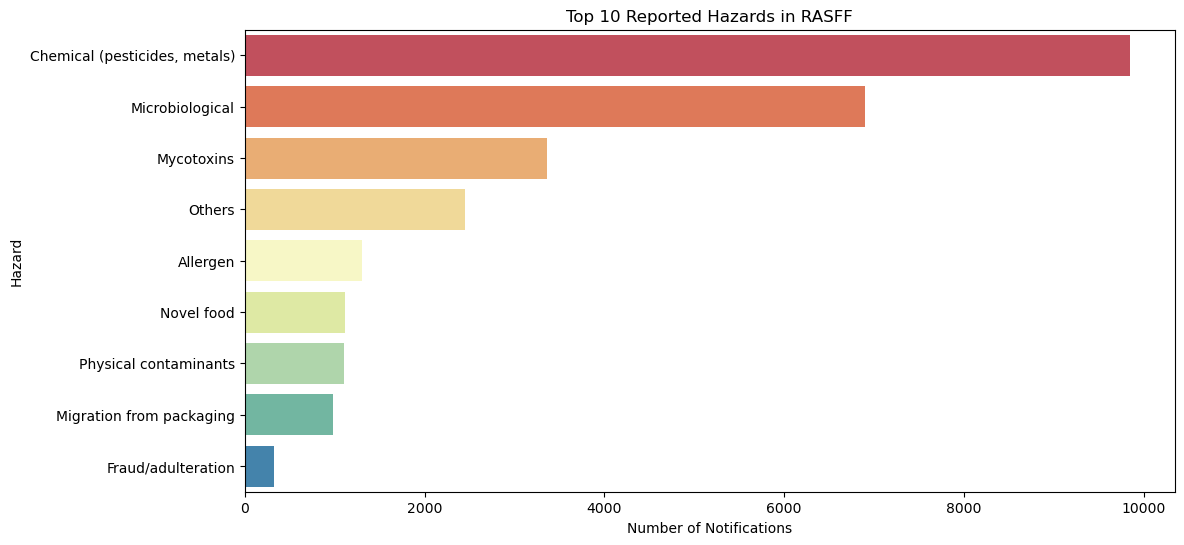

In [21]:
top_hazards = rasff['Hazard_Category_LLM'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=top_hazards.values, y=top_hazards.index, palette='Spectral')
plt.title("Top 10 Reported Hazards in RASFF")
plt.xlabel("Number of Notifications")
plt.ylabel("Hazard")
plt.show()

In [20]:
rasff.to_csv("rasff_clean4.csv", index=False)

- Others 4526--> 2454 
- Novel food ---> 1115
- Fraud : still has novel food cases
many of others cases has unauthorized cases

